In [1]:
import folium

#부산시청 위도
latitude = 35.17984623270711
#부산시청 경도
longitude = 129.07503218044494

In [2]:
import pandas as pd  #데이터를 저장하고 처리하는 패키지

df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_부산_202206.csv', encoding='cp949')

#필요한 컬럼 정보 가져오기
df = df[['시군구명', '상권업종대분류명','상권업종중분류명','위도','경도','상호명', '지점명']]

df.head

<bound method NDFrame.head of         시군구명 상권업종대분류명   상권업종중분류명         위도          경도         상호명  \
0         중구       숙박  모텔/여관/여인숙  35.100979  129.023668         미광장   
1        동래구       음식     닭/오리요리  35.205267  129.087156       BHC치킨   
2        수영구       소매       의복의류  35.143770  129.115397         스텔라   
3       부산진구       음식         한식  35.151645  129.024938        도란도란   
4        사하구    생활서비스         사진  35.102905  128.974794       럭키사진관   
...      ...      ...        ...        ...         ...         ...   
152896    남구    생활서비스        대행업  35.127425  129.068730        천화일화   
152897   기장군       소매       의복의류  35.192230  129.212806         옹헤야   
152898   사하구       음식     커피점/카페  35.100133  128.984282         더벤티   
152899    북구    생활서비스       주택수리  35.214022  129.041703  북구이웃사촌협동조합   
152900  해운대구    생활서비스        대행업  35.173039  129.129881         에드뷰   

                 지점명  
0                NaN  
1                동래점  
2                NaN  
3                NaN  
4 

In [3]:
df_coffee = df[df['상권업종중분류명']=='커피점/카페']
print('부산 커피점/카페 수 : ', len(df_coffee))
df_coffee.head

부산 커피점/카페 수 :  6915


<bound method NDFrame.head of         시군구명 상권업종대분류명 상권업종중분류명         위도          경도      상호명    지점명
15        남구       음식   커피점/카페  35.135963  129.097701   투썸플레이스    대연점
69       수영구       음식   커피점/카페  35.141748  129.107896      더리터    수영점
97       기장군       음식   커피점/카페  35.189328  129.221668     비움카페    NaN
104      기장군       음식   커피점/카페  35.335824  129.164382      로카페    NaN
229       북구       음식   커피점/카페  35.195485  129.010423      콩카페    NaN
...      ...      ...      ...        ...         ...      ...    ...
152863   동래구       음식   커피점/카페  35.197325  129.059828     반달커피  부산사직점
152867   사하구       음식   커피점/카페  35.092286  128.968087  고품격커피공장    신평점
152868  해운대구       음식   커피점/카페  35.180614  129.201600       카페  드크래프트
152895   금정구       음식   커피점/카페  35.240528  129.093307       요기    NaN
152898   사하구       음식   커피점/카페  35.100133  128.984282      더벤티   사하역점

[6915 rows x 7 columns]>

In [4]:
df_tp = df_coffee[df_coffee['상호명'].str.contains('투썸플레이스')]
df_tp.index = range(len(df_tp))
print('부산 투썸플레이스 수: ', len(df_tp))
df_tp

부산 투썸플레이스 수:  57


,시군구명,상권업종대분류명,상권업종중분류명,위도,경도,상호명,지점명
0,남구,음식,커피점/카페,35.135963,129.097701,투썸플레이스,대연점
1,해운대구,음식,커피점/카페,35.175207,129.124597,투썸플레이스,센텀스카이비즈점
2,해운대구,음식,커피점/카페,35.166531,129.133775,투썸플레이스,벡스코점
3,사상구,음식,커피점/카페,35.160841,128.984540,투썸플레이스,NaN
4,해운대구,음식,커피점/카페,35.168657,129.129107,투썸플레이스부산센텀CGV점,부산센텀CGV점
5,사하구,음식,커피점/카페,35.048140,128.969780,투썸플레이스,몰운대점
6,강서구,음식,커피점/카페,35.023028,128.809618,투썸플레이스,가덕해양파크휴게소점
7,강서구,음식,커피점/카페,35.178754,128.957298,투썸플레이스,NaN
8,해운대구,음식,커피점/카페,35.203291,129.119032,투썸플레이스부산반여,부산반여점
9,사하구,음식,커피점/카페,35.106695,128.966393,투썸플레이스투썸부산아트몰링점,투썸부산아트몰링점


In [5]:
df_cb = df_coffee[df_coffee['상호명'].str.contains('카페051')]
df_cb.index = range(len(df_cb))
print('부산 카페051 수: ', len(df_cb))
df_cb.head

부산 카페051 수:  19


<bound method NDFrame.head of     시군구명 상권업종대분류명 상권업종중분류명         위도          경도          상호명         지점명
0     동구       음식   커피점/카페  35.120197  129.039585        카페051      초량육거리점
1    수영구       음식   커피점/카페  35.149596  129.115048        카페051       광안지웰점
2    수영구       음식   커피점/카페  35.168789  129.120656        카페051       민락현대점
3    수영구       음식   커피점/카페  35.155682  129.121760        카페051   051광안리이안점
4    금정구       음식   커피점/카페  35.214546  129.104689        카페051      051서동점
5   해운대구       음식   커피점/카페  35.179086  129.177359  카페051해운대좌동점         레모닝
6   해운대구       음식   커피점/카페  35.167918  129.176441     카페051장산점    시크릿뷰티앤헬스
7     남구       음식   커피점/카페  35.126941  129.109550        카페051          51
8   해운대구       음식   커피점/카페  35.157224  129.144841        카페051          51
9     북구       음식   커피점/카페  35.210866  129.031349    카페051신만덕점     051신만덕점
10    남구       음식   커피점/카페  35.135722  129.103392        카페051        부경대점
11  부산진구       음식   커피점/카페  35.157346  129.062163   카페051서면엔씨점    051서

In [6]:
df_tp['시군구명'].value_counts()

해운대구    11
사하구      7
강서구      5
북구       5
남구       4
중구       4
부산진구     4
기장군      4
동구       3
사상구      2
금정구      2
서구       2
동래구      2
연제구      1
수영구      1
Name: 시군구명, dtype: int64

In [7]:
df_cb['시군구명'].value_counts()

해운대구    4
수영구     3
남구      3
북구      2
부산진구    2
강서구     2
동구      1
금정구     1
동래구     1
Name: 시군구명, dtype: int64

In [8]:
#시리즈를 데이터 프레임에 붙이기

store = pd.Series(df_tp['시군구명'].value_counts(), name = '투썸플레이스')
store1 = pd.Series(df_cb['시군구명'].value_counts(), name = '카페051')

rs = pd.concat([store,store1], axis=1)
rs

,투썸플레이스,카페051
해운대구,11,4.0
사하구,7,NaN
강서구,5,2.0
북구,5,2.0
남구,4,3.0
중구,4,NaN
부산진구,4,2.0
기장군,4,NaN
동구,3,1.0
사상구,2,NaN


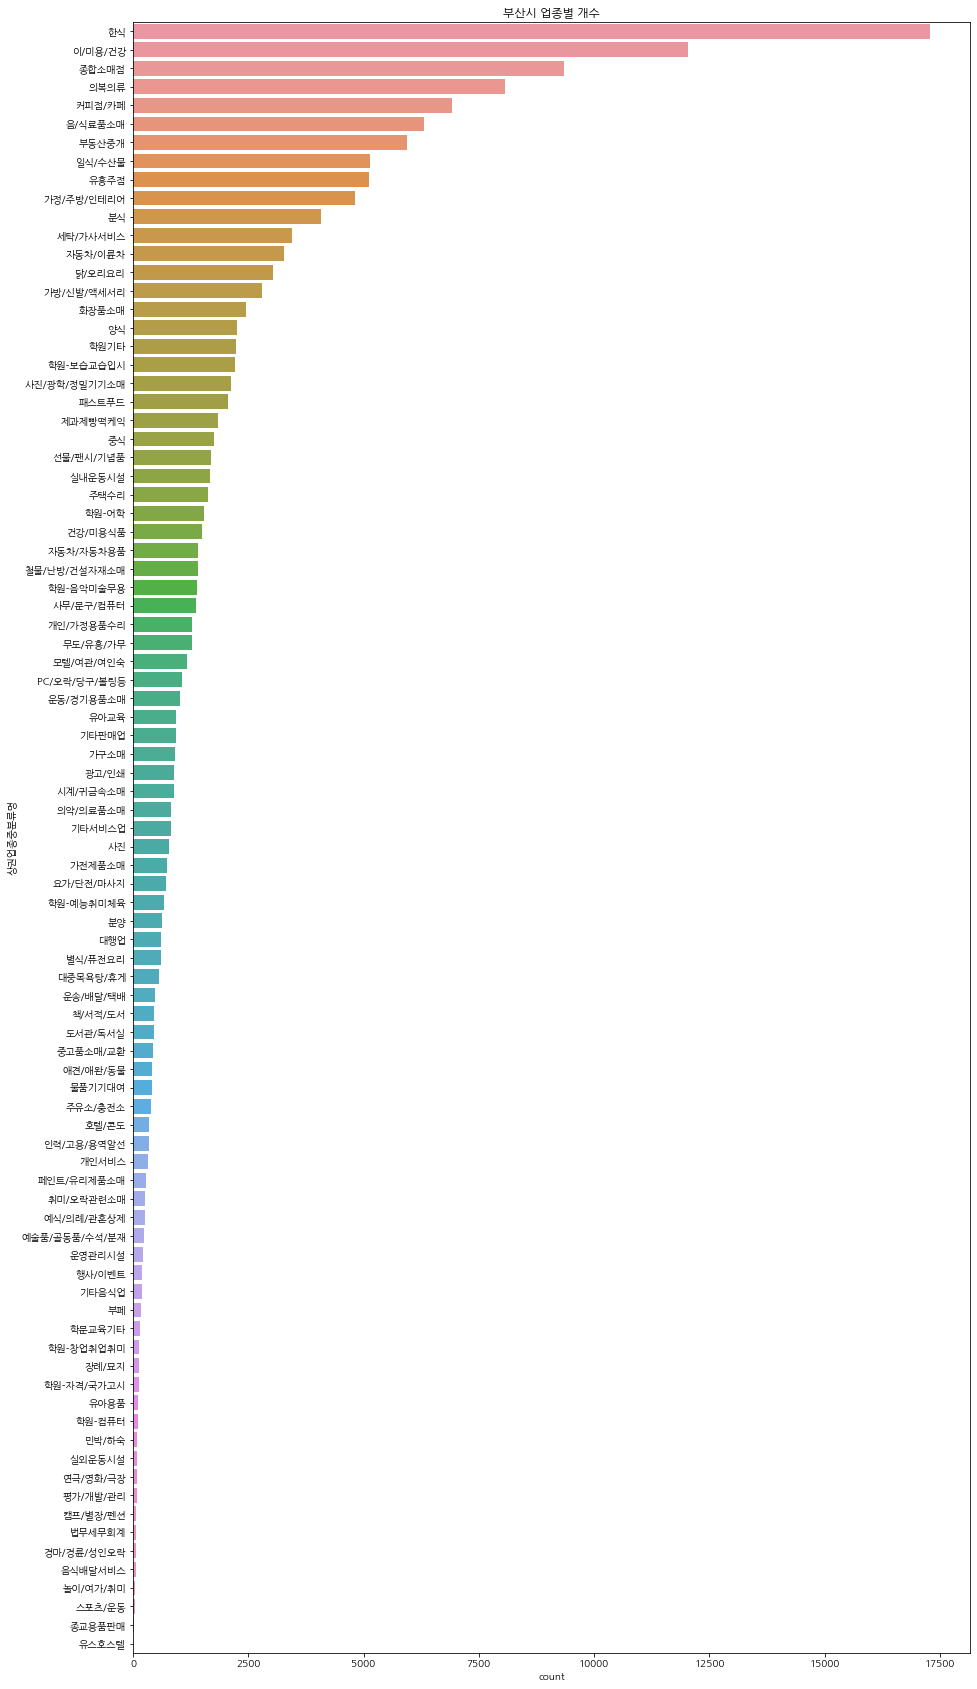

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(15, 30))
sns.countplot(y=df['상권업종중분류명'],
order = df['상권업종중분류명'].value_counts().index)
plt.title('부산시 업종별 개수')
plt.show()

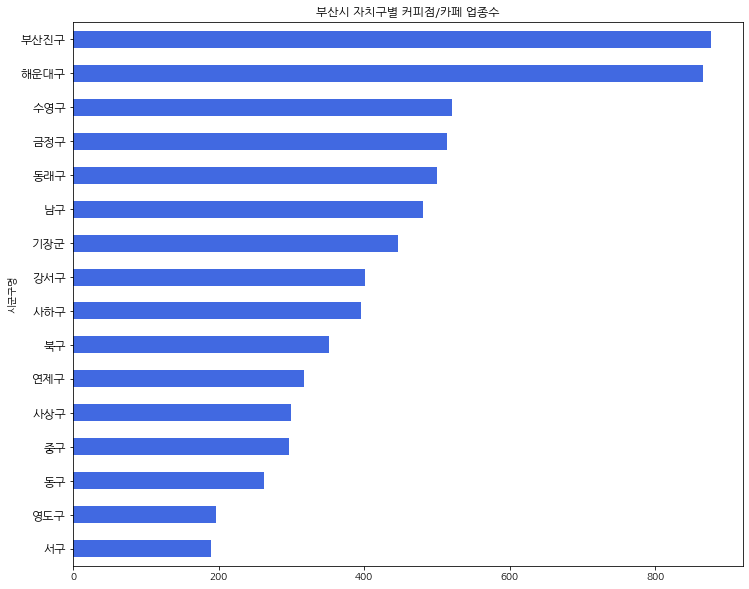

In [10]:
plt.figure(figsize=(12,10))
df_coffee.loc[df_coffee['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('부산시 자치구별 커피점/카페 업종수')
plt.show()

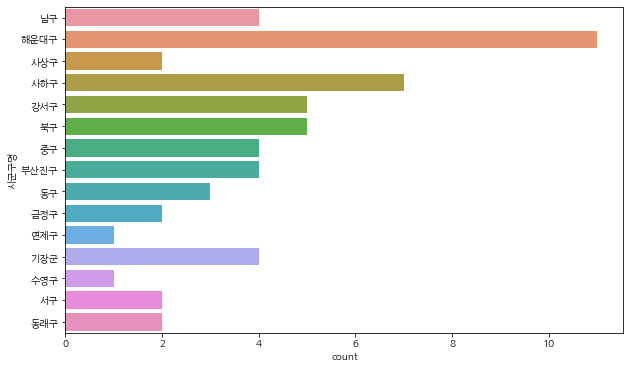

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df_tp, y='시군구명')
plt.show()

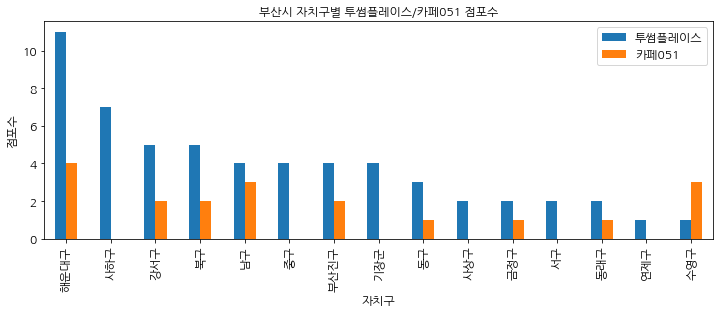

In [12]:
#차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정

ax = rs.plot(kind='bar', title='부산시 자치구별 투썸플레이스/카페051 점포수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('자치구', fontsize=12)          # x축 정보 표시
ax.set_ylabel('점포수', fontsize=12)     # y축 정보 표시
ax.legend(['투썸플레이스', '카페051'], fontsize=12)    # 범례 지정

In [13]:
r = requests.get('https://raw.githubusercontent.com/yousungkim1216/edu/main/jupyter/busan_gu.json')

c = r.content

In [14]:
busan_geo = json.loads(c)

In [15]:
m = folium.Map(
    location=[35.17984623270711, 129.07503218044494],
    zoom_start=11,
)

folium.GeoJson(busan_geo, name='지역구').add_to(m)
m

In [16]:
# 투썸플레이스/카페051의 맵 클러스터 기능 활용
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15)
coords = df_tp[['위도', '경도']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long, name in zip(df_tp['위도'], df_tp['경도'], df_tp['지점명']):
    folium.Marker([lat,long], icon = folium.Icon(icon='star', color='green'),
                  tooltip=name,
                  popup = f'<pre>투썸플레이스<br>{name}</pre>').add_to(marker_cluster)

for lat1, long1, name1 in zip(df_cb['위도'], df_cb['경도'], df_cb['지점명']):
    folium.Marker([lat1,long1], icon = folium.Icon(icon='home', color='blue'),
                  tooltip='카페051',
                  popup = f'<pre>카페051<br>{name1}</pre>').add_to(marker_cluster)

m